In [43]:
import skfuzzy as fuzzy
import numpy as np

In [44]:
from skfuzzy import control as ctrl

In [45]:
quality = ctrl.Antecedent(np.arange(0,11,1),"quality")
service = ctrl.Antecedent(np.arange(0,11,1),"service")
tip = ctrl.Consequent(np.arange(0,11,1),"tip")

In [46]:
quality.automf(3)

In [47]:
service.automf(3)

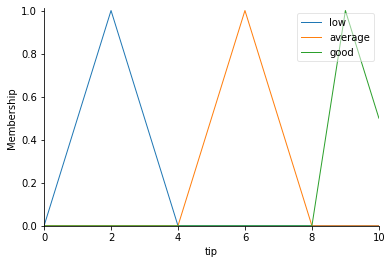

In [48]:
tip['low']=fuzzy.trimf(tip.universe,[0,2,4])
tip['average']=fuzzy.trimf(tip.universe,[4,6,8])
tip['good']=fuzzy.trimf(tip.universe,[8,9,11])
tip.view()

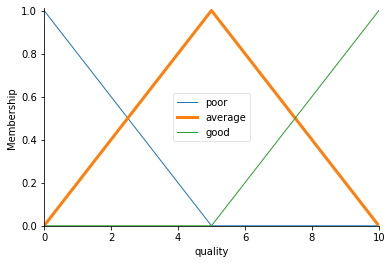

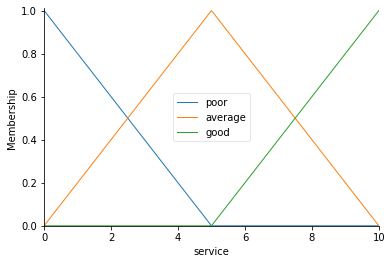

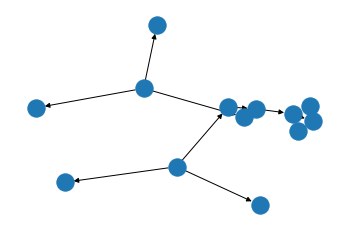

In [49]:
quality['average'].view()
service.view()
# tip.view()
Rule1=ctrl.Rule(quality['poor']&service['poor'],
tip['low'])
Rule2=ctrl.Rule(quality[ 'average']&service[ 'average'],
tip[ 'average'])
Rule3=ctrl.Rule(quality['good']&service['good'],
tip['good'])
# Rule.view
Rule1.view()
tipping_ctrl = ctrl.ControlSystem([Rule1,Rule2,Rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

7.824064171122997


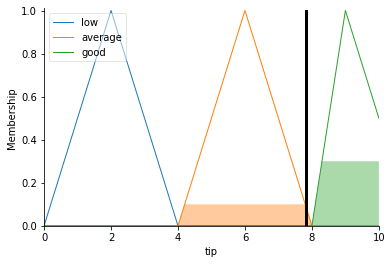

In [50]:
tipping.input['quality']=6.5
tipping.input['service']=9.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)